In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\sharath\\Desktop\\all proj\\hypothyroid.csv")

In [3]:
df.shape

(3772, 30)

In [4]:
df.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative


In [5]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [7]:
for i in df:
    print(df[i].value_counts())

59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: age, Length: 94, dtype: int64
F    2480
M    1142
?     150
Name: sex, dtype: int64
f    3308
t     464
Name: on_thyroxine, dtype: int64
f    3722
t      50
Name: query_on_thyroxine, dtype: int64
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid_surgery, dtype: int64
f    3713
t      59
Name: I131_treatment, dtype: int64
f    3538
t     234
Name: query_hypothyroid, dtype: int64
f    3535
t     237
Name: query_hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3771
t       1
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
t    3403
f     369
Name: TSH_measured, dtype: int64
?     

In [8]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [9]:
for i in df:
    count = df[i][df[i]=='?'].count()
    if count !=0:
        print(i+':',count)
    

age: 1
sex: 150
TSH: 369
T3: 769
TT4: 231
T4U: 387
FTI: 385
TBG: 3772


In [10]:
df=df.drop(["TBG"],axis=1)

In [11]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [12]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [13]:
df=df.drop(["TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"],axis=1)

In [14]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,?,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,?,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,?,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative


In [15]:
for i in df.columns:
    count = df[i][df[i]=='?'].count()
    if count!=0:
        df[i] = df[i].replace('?',np.nan)

In [16]:
 df["age"] = df["age"].replace('?',np.nan)

In [17]:
df['age'][df['age']=='?'].count()

0

In [18]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [20]:
df['sex'] = le_sex.fit_transform(df['sex'])

In [21]:
df.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,1,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,0,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,0,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
5,18,0,t,f,f,f,f,f,f,f,...,f,f,f,0.03,NaN,183,1.3,141,other,negative
6,59,0,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,72,0.92,78,other,negative
7,80,0,f,f,f,f,f,f,f,f,...,f,f,f,2.2,0.6,80,0.7,115,SVI,negative
8,66,0,f,f,f,f,f,f,f,f,...,t,f,f,0.6,2.2,123,0.93,132,SVI,negative
9,68,1,f,f,f,f,f,f,f,f,...,f,f,f,2.4,1.6,83,0.89,93,SVI,negative


In [22]:
le_on_thyroxine = LabelEncoder()
df['on_thyroxine'] = le_on_thyroxine.fit_transform(df['on_thyroxine'])

In [23]:
le_query_on_thyroxine = LabelEncoder()
df['query_on_thyroxine'] = le_query_on_thyroxine.fit_transform(df['query_on_thyroxine'])

In [24]:
le_on_antithyroid_medication = LabelEncoder()
df['on_antithyroid_medication'] = le_on_antithyroid_medication.fit_transform(df['on_antithyroid_medication'])

In [25]:
le_sick= LabelEncoder()
df['sick'] = le_sick.fit_transform(df['sick'])

In [26]:
le_pregnant= LabelEncoder()
df['pregnant'] = le_pregnant.fit_transform(df['pregnant'])

In [27]:
le_thyroid_surgery= LabelEncoder()
df['thyroid_surgery'] = le_thyroid_surgery.fit_transform(df['thyroid_surgery'])

In [28]:
le_thyroid_surgery= LabelEncoder()
df['thyroid_surgery'] = le_thyroid_surgery.fit_transform(df['thyroid_surgery'])

In [29]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

In [30]:
le_I131_treatment= LabelEncoder()
df['I131_treatment'] = le_I131_treatment.fit_transform(df['I131_treatment'])

In [31]:
le_query_hypothyroid= LabelEncoder()
df['query_hypothyroid'] = le_query_hypothyroid.fit_transform(df['query_hypothyroid'])

In [32]:
le_query_hyperthyroid= LabelEncoder()
df['query_hyperthyroid'] = le_query_hyperthyroid.fit_transform(df['query_hyperthyroid'])

In [33]:
le_lithium= LabelEncoder()
df['lithium'] = le_lithium.fit_transform(df['lithium'])

In [34]:
le_goitre= LabelEncoder()
df['goitre'] = le_goitre.fit_transform(df['goitre'])

In [35]:
le_tumor= LabelEncoder()
df['tumor'] = le_tumor.fit_transform(df['tumor'])

In [36]:
le_hypopituitary= LabelEncoder()
df['hypopituitary'] = le_hypopituitary.fit_transform(df['hypopituitary'])

In [37]:
le_goitre= LabelEncoder()
df['goitre'] = le_goitre.fit_transform(df['goitre'])

In [38]:
le_psych= LabelEncoder()
df['psych'] = le_psych.fit_transform(df['psych'])

In [39]:
# le_TSH= LabelEncoder()
# df['TSH'] = le_TSH.fit_transform(df['TSH'])

In [40]:
# le_T3= LabelEncoder()
# df['T3'] = le_T3.fit_transform(df['T3'])

In [41]:
# le_TT4= LabelEncoder()
# df['TT4'] = le_TT4.fit_transform(df['TT4'])

In [42]:
# le_T4U= LabelEncoder()
# df['T4U'] = le_T4U.fit_transform(df['T4U'])

In [43]:
# le_FTI= LabelEncoder()
# df['FTI'] = le_FTI.fit_transform(df['FTI'])

In [44]:
le_referral_source= LabelEncoder()
df['referral_source'] = le_referral_source.fit_transform(df['referral_source'])

In [45]:
df.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,1,negative
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,4,negative
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,4,negative
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,4,negative
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,3,negative
5,18,0,1,0,0,0,0,0,0,0,...,0,0,0,0.03,NaN,183,1.3,141,4,negative
6,59,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,72,0.92,78,4,negative
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,2.2,0.6,80,0.7,115,3,negative
8,66,0,0,0,0,0,0,0,0,0,...,1,0,0,0.6,2.2,123,0.93,132,3,negative
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,2.4,1.6,83,0.89,93,3,negative


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3772 non-null   int32 
 2   on_thyroxine               3772 non-null   int32 
 3   query_on_thyroxine         3772 non-null   int32 
 4   on_antithyroid_medication  3772 non-null   int32 
 5   sick                       3772 non-null   int32 
 6   pregnant                   3772 non-null   int32 
 7   thyroid_surgery            3772 non-null   int64 
 8   I131_treatment             3772 non-null   int32 
 9   query_hypothyroid          3772 non-null   int32 
 10  query_hyperthyroid         3772 non-null   int32 
 11  lithium                    3772 non-null   int32 
 12  goitre                     3772 non-null   int64 
 13  tumor                      3772 non-null   int32 
 14  hypopitu

In [47]:
df = pd.get_dummies(df,columns=['referral_source'],drop_first=True)

In [48]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_1,referral_source_2,referral_source_3,referral_source_4
0,41,0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,negative,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,negative,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,negative,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,negative,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,negative,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,negative,0,0,0,1
3768,68,0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,negative,0,0,1,0
3769,74,0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,negative,0,0,0,1
3770,72,1,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,negative,0,0,1,0


In [49]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Class', 'referral_source_1', 'referral_source_2',
       'referral_source_3', 'referral_source_4'],
      dtype='object')

In [50]:
df.rename(columns={'referral_source_1':'referral_SVHC','referral_source_2':'referral_other',
       'referral_source_3':'referral_SVI', 'referral_source_4':'referral_SVHD'},inplace=True)

In [51]:
df.head(1)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_SVHC,referral_other,referral_SVI,referral_SVHD
0,41,0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,negative,1,0,0,0


In [52]:
Class= LabelEncoder()
df['Class'] = Class.fit_transform(df['Class'])

In [53]:
df.head(30)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_SVHC,referral_other,referral_SVI,referral_SVHD
0,41,0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,0,0,1,0
5,18,0,1,0,0,0,0,0,0,0,...,0.03,NaN,183,1.3,141,1,0,0,0,1
6,59,0,0,0,0,0,0,0,0,0,...,NaN,NaN,72,0.92,78,1,0,0,0,1
7,80,0,0,0,0,0,0,0,0,0,...,2.2,0.6,80,0.7,115,1,0,0,1,0
8,66,0,0,0,0,0,0,0,0,0,...,0.6,2.2,123,0.93,132,1,0,0,1,0
9,68,1,0,0,0,0,0,0,0,0,...,2.4,1.6,83,0.89,93,1,0,0,1,0


In [54]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [55]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_SVHC                0
referral_other               0
referral_SVI                 0
referral_SVHD                0
dtype: int64

<AxesSubplot:xlabel='age'>

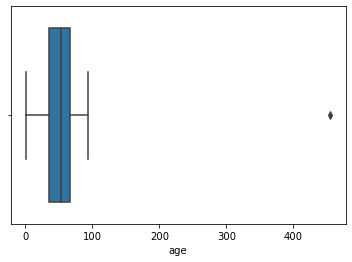

In [56]:
sns.boxplot("age",data=new_df)

In [57]:
upper_quartile = np.percentile(new_df.age, 75)
upper_quartile

67.0

In [58]:
lower_quartile = np.percentile(new_df.age, 25)
lower_quartile

36.0

In [59]:
iqr=upper_quartile-lower_quartile
iqr

31.0

In [60]:
upper_lim = new_df.age[new_df.age<=upper_quartile+1.5*iqr].max()
upper_lim

94.0

In [61]:
new_df.age=np.where(new_df.age > upper_lim , upper_lim,new_df.age)

<AxesSubplot:xlabel='age'>

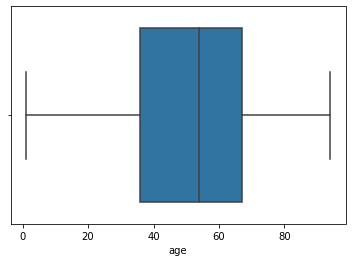

In [62]:
sns.boxplot("age",data=new_df)

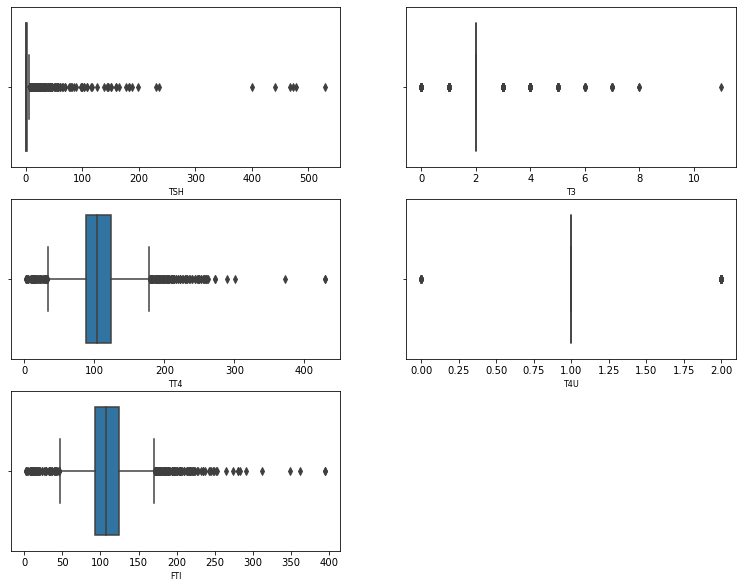

In [63]:
cont=['TSH', 'T3', 'TT4', 'T4U','FTI']
plt.figure(figsize=(13,10))
n=1
for i in cont:
    ax= plt.subplot(3,2,n)
    sns.boxplot(new_df[i])
    plt.xlabel(i,fontsize=8)
    n+=1
plt.show()

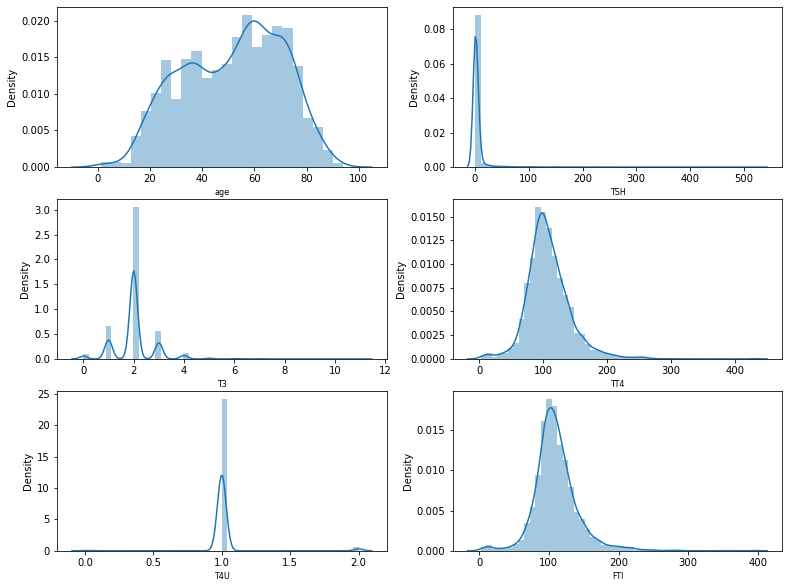

In [64]:
cont=['age','TSH', 'T3', 'TT4', 'T4U','FTI']
plt.figure(figsize=(13,10))
n=1
for i in cont:
    ax= plt.subplot(3,2,n)
    sns.distplot(new_df[i])
    plt.xlabel(i,fontsize=8)
    n+=1
plt.show()

In [65]:
#sns.distplot("TSH")

<AxesSubplot:xlabel='Class', ylabel='count'>

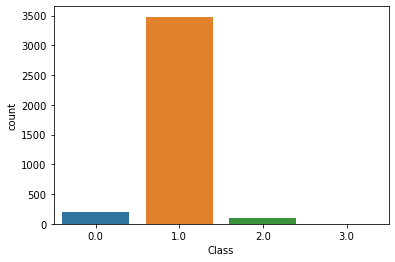

In [66]:
sns.countplot(new_df["Class"])

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   float64
 2   on_thyroxine               3772 non-null   float64
 3   query_on_thyroxine         3772 non-null   float64
 4   on_antithyroid_medication  3772 non-null   float64
 5   sick                       3772 non-null   float64
 6   pregnant                   3772 non-null   float64
 7   thyroid_surgery            3772 non-null   float64
 8   I131_treatment             3772 non-null   float64
 9   query_hypothyroid          3772 non-null   float64
 10  query_hyperthyroid         3772 non-null   float64
 11  lithium                    3772 non-null   float64
 12  goitre                     3772 non-null   float64
 13  tumor                      3772 non-null   float

In [68]:
X=new_df.iloc[:,new_df.columns !="Class"]
y=new_df.iloc[:,new_df.columns == "Class"]

## smote

In [69]:
new_df.Class.value_counts()

1.0    3481
0.0     194
2.0      95
3.0       2
Name: Class, dtype: int64

In [70]:
negative = new_df[new_df.Class==1]                 

In [71]:
compensated_hypothyroid = new_df[new_df.Class==0]     

In [72]:
primary_hypothyroid   = new_df[new_df.Class==2]       

In [73]:
secondary_hypothyroid = new_df[new_df.Class==3] 

In [74]:
from sklearn.utils import resample
compensated = resample(compensated_hypothyroid,replace =True,n_samples=len(negative),random_state=20)

In [75]:
primary = resample(primary_hypothyroid,replace =True,n_samples=len(negative),random_state=20)

In [76]:
secondary = resample(secondary_hypothyroid,replace =True,n_samples=len(negative),random_state=20)

In [77]:
smote=pd.concat([negative,compensated,primary,secondary])

In [78]:
smote.Class.value_counts()

1.0    3481
0.0    3481
2.0    3481
3.0    3481
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

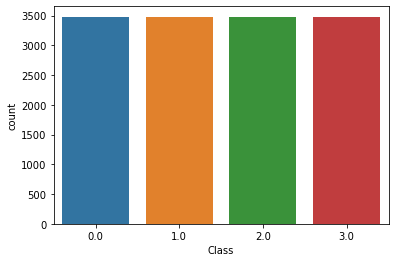

In [79]:
sns.countplot(smote["Class"])

In [80]:
x1=smote.loc[:,smote.columns !="Class"]
y1=smote.loc[:,smote.columns == "Class"]

In [81]:
y1.value_counts()

Class
0.0      3481
1.0      3481
2.0      3481
3.0      3481
dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear",random_state=0)
model.fit(x1,y1)
model.intercept_

array([-2.13147264, -2.91010805,  4.23765441,  6.8161582 ])

In [83]:
model.coef_

array([[ 7.25735018e-03, -2.92499865e-01, -5.25001749e+00,
         1.31212661e+00, -3.36281114e-01,  8.97725928e-01,
        -3.58435679e+00, -2.99385994e+00,  4.65828690e-01,
         2.58462889e-01,  2.01681615e-01,  7.04431612e-01,
        -2.15294823e+00,  5.60309954e-01, -2.02160874e-01,
         6.86849045e-01, -8.67267579e-04,  7.12615434e-02,
         2.69365541e-02, -9.52456886e-01, -6.33987711e-03,
        -4.65259426e-01,  5.96877721e-01,  2.78765695e-01,
         7.16954693e-02],
       [ 3.94256702e-03,  2.23029132e-01,  7.59527319e+00,
         9.54570314e-01,  1.83032831e+00,  4.24043377e-01,
         1.12623126e+00,  5.69589239e+00,  3.51608641e-01,
        -2.75652063e+00, -1.64630394e-02, -2.52018937e-01,
         1.77606662e+00,  1.76888579e-01,  8.69080517e-02,
        -4.52533669e-01, -7.52012999e-01,  5.45180922e-01,
         3.80077516e-02, -1.20495497e+00,  2.50548629e-02,
         1.38811266e+00,  4.05909797e-02,  7.16859600e-01,
         1.67824067e-02],
    

In [84]:
model.score(x1,y1)

0.9426170640620511

In [85]:
y_pred1= model.predict(x1)

In [86]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample
print(classification_report(y1,y_pred1))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      3481
         1.0       0.95      0.94      0.95      3481
         2.0       0.91      0.96      0.93      3481
         3.0       0.99      1.00      1.00      3481

    accuracy                           0.94     13924
   macro avg       0.94      0.94      0.94     13924
weighted avg       0.94      0.94      0.94     13924



## without smote

In [87]:
x = new_df.iloc[:,new_df.columns !="Class"]
y = new_df.iloc[:,new_df.columns == "Class"]

In [88]:
model1=LogisticRegression(solver="liblinear",random_state=0)
model1.fit(x1,y1)
model1.intercept_

array([-2.13147264, -2.91010805,  4.23765441,  6.8161582 ])

In [89]:
model1.score(x,y)

0.9395546129374337

In [90]:
y_pred= model1.predict(x)

In [91]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
print(cm)

[[ 170    8   16    0]
 [ 145 3281   30   25]
 [   3    1   91    0]
 [   0    0    0    2]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))                      

              precision    recall  f1-score   support

         0.0       0.53      0.88      0.66       194
         1.0       1.00      0.94      0.97      3481
         2.0       0.66      0.96      0.78        95
         3.0       0.07      1.00      0.14         2

    accuracy                           0.94      3772
   macro avg       0.57      0.94      0.64      3772
weighted avg       0.96      0.94      0.95      3772



## one over rest model

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x=scaler.fit_transform(x)

In [94]:
df_ovr=LogisticRegression(multi_class="ovr")
df_ovr.fit(x,y)

LogisticRegression(multi_class='ovr')

In [95]:
df_ovr.score(x,y)

0.9347826086956522

## multinomial model

In [96]:
df_mul=LogisticRegression(multi_class="multinomial")
df_mul.fit(x,y)

LogisticRegression(multi_class='multinomial')

In [97]:
df_mul.score(x,y)

0.9369034994697774

In [98]:
pred_mul = df_mul.predict(x)

In [99]:
print(classification_report(y,pred_mul))

              precision    recall  f1-score   support

         0.0       1.00      0.01      0.01       194
         1.0       0.94      1.00      0.97      3481
         2.0       0.96      0.57      0.72        95
         3.0       0.00      0.00      0.00         2

    accuracy                           0.94      3772
   macro avg       0.73      0.39      0.42      3772
weighted avg       0.94      0.94      0.91      3772

